## Project Phase IV
INFO 2950 <br>
28 April 2021 <br>
Ava Chen (ac2572), Lauren Crosbie-Walsh (lmc348), Elita Gao (eg556), Kate Hofer (klh253)

*******
## Introduction

(AVA INTRO)

### Primary Research Questions: 
- **What is the correlation between ingredients in skincare products and the prices or ratings of the product? In particular, are product prices influenced more so by name value of brands or the quality of ingredients? Are expensive products worth the cost?**
- **What trends do we see in terms of ingredients between skincare products and can we use our data to recommend specific products and different customers who may be looking for best value products, best overall product, or best product for specific categories?**


******
## Data Description

**To answer these questions, we will be exploring the relationships between the price, average ratings, ingredients, product categories, brand and skin type fit.**  

### Dataset 1:
- Dataset 1 was created by Jiwon Jeong (GitHub user jjone36) for a Cosmetic Recommendation System on November 28, 2018. Here is the article that describes her scraping and analysis process: https://towardsdatascience.com/for-your-skin-beauty-mapping-cosmetic-items-with-bokeh-af7523ca68e5.
- Observations: skincare product items. Attributes include its price, brand, rank, ingredients, and for what skin type for whom the product would be most useful. Each row corresponds to one product.
- Since it is difficult to choose what cosmetic items fit for different skin types, the creator decided to build a simple cosmetic recommendation system.
- It is unclear who funded the creation of the dataset. Since the dataset does not involve experimental data but rather observational data, it is possible that no funding was required.
- The skincare products may not be representative of all brands because the creator only used data from Sephora and not only cosmetic stores. Because of this, prices may also not be the original prices from the brands themselves but marked by Sephora. In addition, it is possible that these products have changed from 2018 to now.
- The dataset that we are using is the original dataset that the creator had not preprocessed. We wanted to start from scratch for more data-cleaning practice and learning. In addition, our research question differs from the creator’s. Rather than re-building the cosmetic recommendation system that she had built, we instead are examining any correlations between the rank and price of cosmetic items between different brands and for different skin types.
- The people involved in data collection contributed to the 'rank' column for their average reviews.
- Our raw source data can be found in our Colab Notebooks Google Drive, titled <cosmetic.csv>: https://drive.google.com/drive/folders/1br0b-r_qFnh-bNIY8xPsmC8a4Pw-ulZX?usp=sharing. Alternatively, it can also be found on the creator’s GitHub.


*******
## Preregistration Statement

#### Introduction:
When looking at our skin care datasets from Sephora and [Ulta](https://www.ulta.com/skin-care?N=2707), we are primarily interested in the relationship between rating and price of products from different brands and created from different ingredients. Along with our main questions, we are also examining whether high-end brands get better ratings, what ingredients are most popular in acne products, and whether products containing parabens have significant differential ratings and prices from those that do not.

#### Preregistration of two analyses :
1. To determine **whether high-end products have differential ratings from drugstore and mid-price items**, we will perform a T-test of the mean ratings between these price points. We will also perform linear regression and possibly k-means clustering, if applicable. For the linear regression, ratings will be the dependent variable and price will be the independent variable.
- <ins>**What we expect to see:**</ins> We do not expect to see a clear positive correlation between price and rating, since drugstore and mid-price items often have as good or even better performance on the skin. In addition, the demographics of the consumers may also vary based on social-economic status, attributing to their different needs in skincare.
2. Next, **we will examine parabens**. In the ‘ingredients’ column of the datasets, we will index to find all the products that contain parabens such as methylparabens and ethylparabens. We will then perform two linear regressions: one with price as the outcome and a second with rating as the outcome. The predictor variables for these regressions will be a dummy variable indicating if the product contains parabens, price/rating (whichever is not the dependent variable), and skin type dummy variables. 
- <ins>**What we expect to see:**</ins> Parabens are not favorable in skin products. Many products will advertise that they are paraben-free. Though parabens increase shelf life, they have been [found to increase breast cancer cell tissue](https://www.byrdie.com/what-are-parabens). However, those who are purchasing products with parabens may not be aware of that fact, living in a state of “blissful ignorance,” so we also do not instinctively expect any significant correlations between products with and without parabens. On the inverse, those who are aware of the potentially harmful impacts of parabens may be proud of their choice to purchase paraben-free products, thus rating non-paraben products more highly.


*****
## Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 10.0)
plt.style.use('seaborn-poster')




## Dataset 1 (Sephora)

In [2]:
#importing our cleaned skin.csv file to a dataframe we can use for analysis
skin = pd.read_csv('skin.csv')

In [3]:
skin.head()

,label,brand,name,price,rank,ingredients,normal,oily,combination,dry,sensitive,full,natural,matte,light,radiant
0,moisturizing,LA MER,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,179.0,4.1,"-Pitera™: A bio-ingredient rich in vitamins, o...",1,1,1,1,1,0,0,0,0,0
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.0,4.4,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,1,1,1,1,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.0,4.1,-Collagen: Supports skin elasticity for a yout...,1,1,1,1,1,1,1,0,0,0


****
### Summary of `skin` Dataframe:
- Summary functions
- Visual displays 

Here are the summary statistics of our cleaned data:

In [4]:
skin.describe()

,price,rank,normal,oily,combination,dry,sensitive,full,natural,matte,light,radiant
count,1626.000000,1624.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000
mean,55.820381,4.162931,0.654601,0.613497,0.660123,0.614110,0.505521,0.003681,0.003067,0.004294,0.006135,0.002454
std,44.420960,0.610399,0.475644,0.487098,0.473813,0.486954,0.500123,0.060578,0.055317,0.065411,0.078109,0.049492
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,4.300000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68.000000,4.500000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,370.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Next, we add a new column, `contains_parabens`, that specifies whether the product contains parabens (=1) or not (=0)

In [5]:
#Add a new column that specifies whether the product contains parabens
skin=skin.copy()
skin['ingredients'] = skin['ingredients'].astype(str)
parabens_list=['paraben']
skin['contains_parabens']=0

pos=-1
for x in skin['ingredients']:
    pos+=1
    for paraben in parabens_list:
        if paraben in x:
            skin['contains_parabens'].loc[pos]=1
skin.head()

C:\Users\ezoeg\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,label,brand,name,price,rank,ingredients,normal,oily,combination,dry,sensitive,full,natural,matte,light,radiant,contains_parabens
0,moisturizing,LA MER,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,179.0,4.1,"-Pitera™: A bio-ingredient rich in vitamins, o...",1,1,1,1,1,0,0,0,0,0,1
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.0,4.4,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,1,1,1,1,0,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.0,4.1,-Collagen: Supports skin elasticity for a yout...,1,1,1,1,1,1,1,0,0,0,0


In [6]:
skin['normal'].value_counts()
skin['matte'].value_counts()

0    1623
1       7
Name: matte, dtype: int64

Here are the average prices of the brands:

In [7]:
skin.groupby(['brand'])['price'].mean()

brand
ALGENIST               70.133333
AMOREPACIFIC           97.666667
ANTHONY                32.000000
APIVITA                30.000000
BAREMINERALS           35.833333
                         ...    
VITA LIBERATA          49.500000
VOLITION BEAUTY        49.400000
WANDER BEAUTY          25.000000
YOUTH TO THE PEOPLE    46.714286
YVES SAINT LAURENT     73.000000
Name: price, Length: 116, dtype: float64

Here is a box plot of the average prices by brand. As you can see, there are over 100 brands. Most of the data is left-skewed with a few brands, such as La Mer and Sk-II that have higher prices and larger distributions.

C:\Users\ezoeg\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


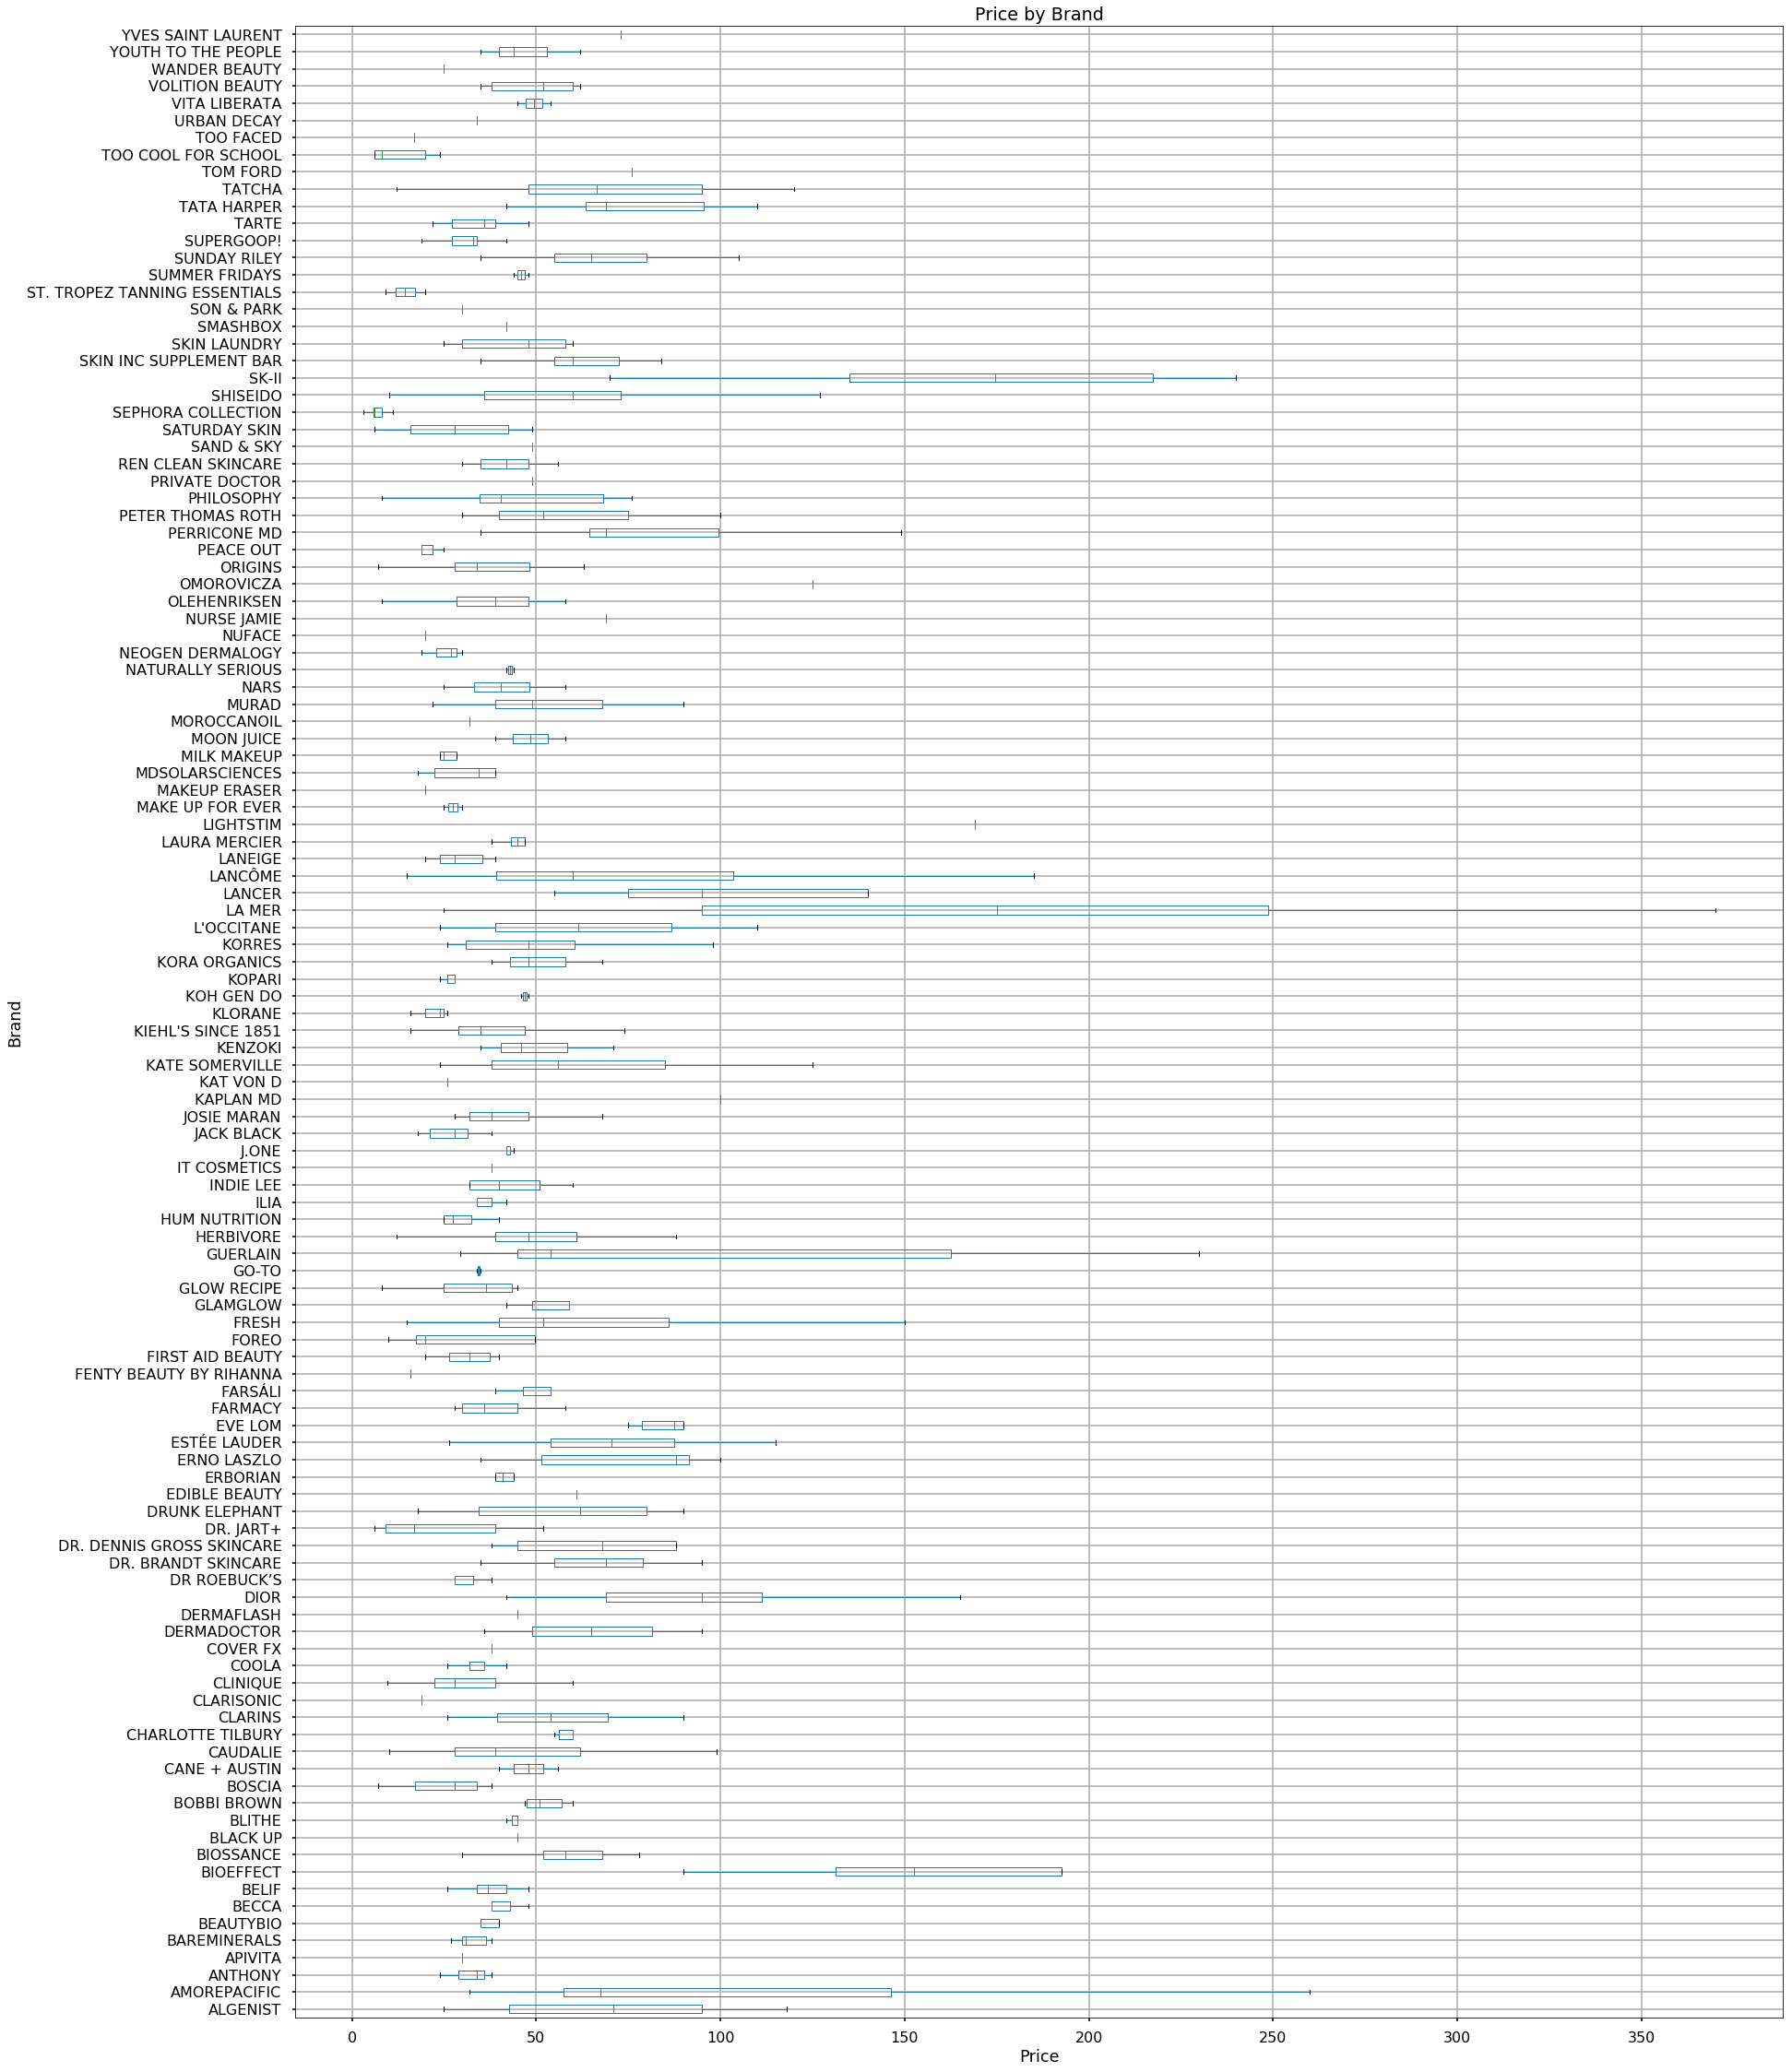

In [8]:
plot=skin.boxplot('price', by='brand', vert=False, figsize = (28,40))
plt.xlabel('Price')
plt.ylabel('Brand')
plt.title('Price by Brand')
plt.suptitle('')
plt.show()

Here are the average ranks of the brands:

In [9]:
skin.groupby(['brand'])['rank'].mean()

brand
ALGENIST               4.023333
AMOREPACIFIC           4.254167
ANTHONY                4.233333
APIVITA                4.000000
BAREMINERALS           4.116667
                         ...   
VITA LIBERATA          3.850000
VOLITION BEAUTY        4.420000
WANDER BEAUTY          4.450000
YOUTH TO THE PEOPLE    4.357143
YVES SAINT LAURENT     3.400000
Name: rank, Length: 116, dtype: float64

Here is a box plot of the average rank by brand. Most of the data is right-skewed by some brands' rankings are more spread out, such as St. Tropez Tanning Essentials and Foreo. St. Tropez had the lowest rank and Foreo had a long tail but still a generally high rank.

C:\Users\ezoeg\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


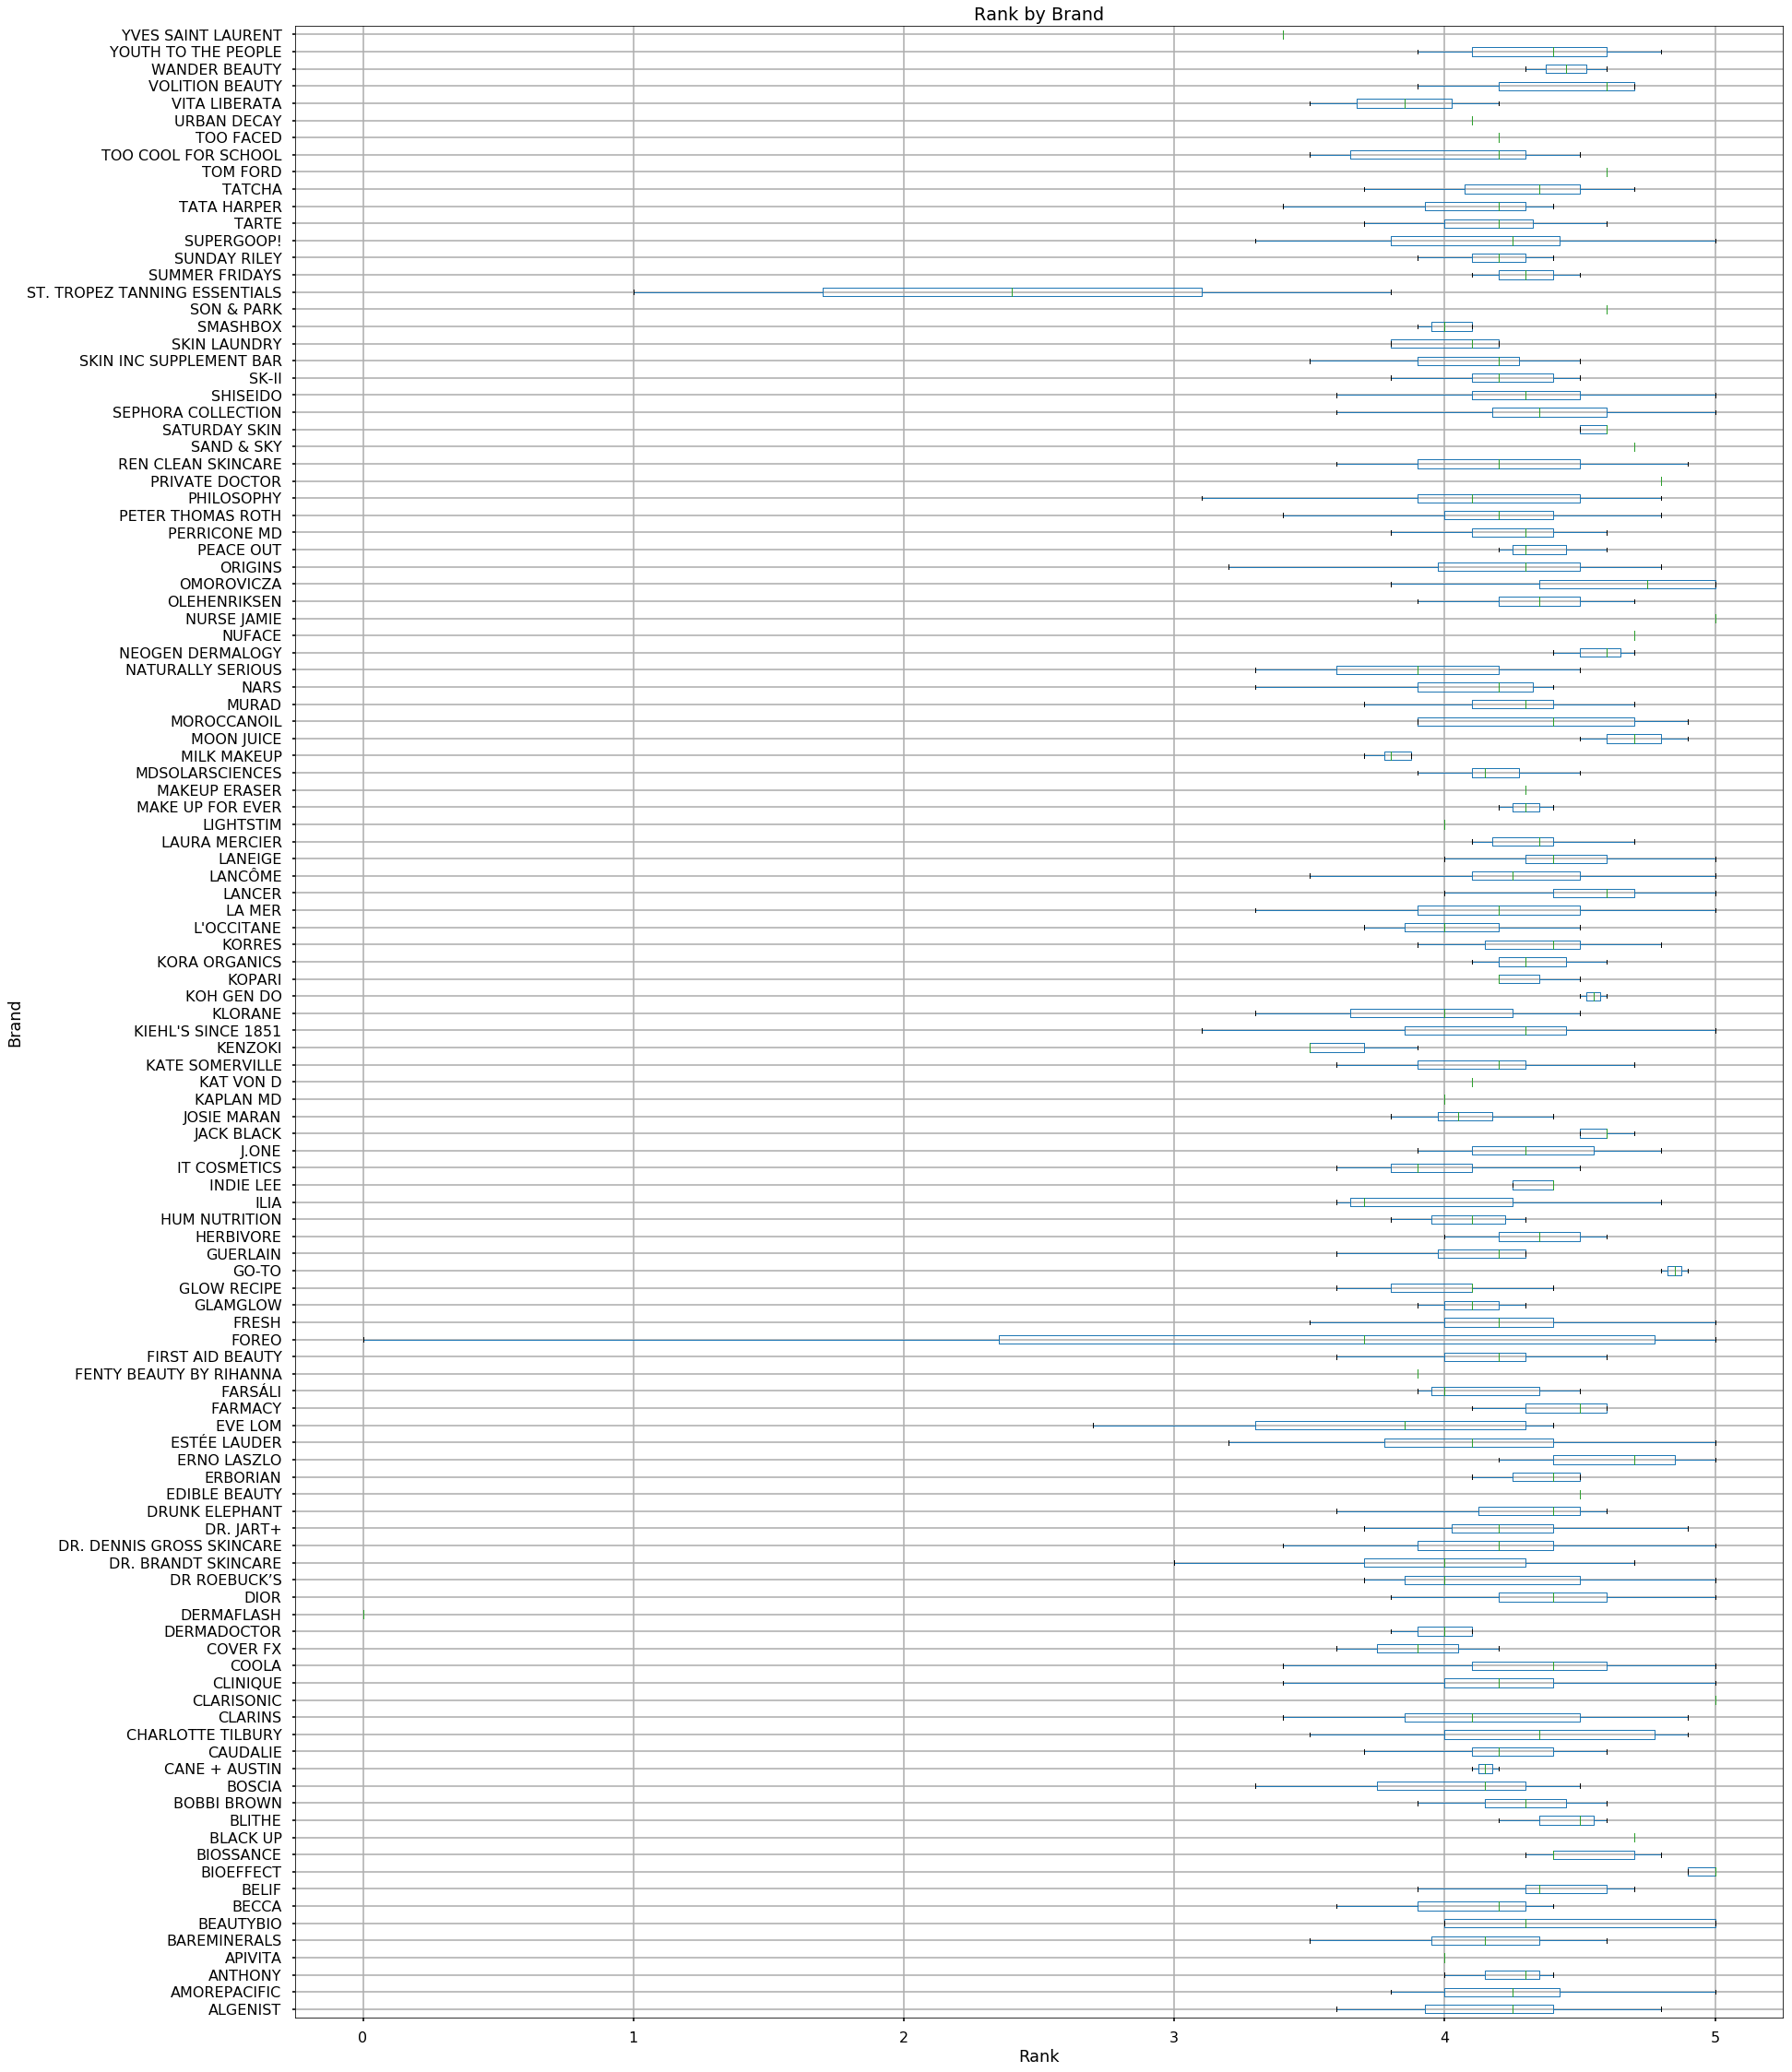

In [10]:
plot=skin.boxplot('rank', by='brand', vert=False, figsize = (28,40))
plt.xlabel('Rank')
plt.ylabel('Brand')
plt.title('Rank by Brand')
plt.suptitle('')
plt.show()

Here are the average rank of different labels:

In [11]:
skin.groupby(['label'])['rank'].mean()

label
cleanser        4.298997
eye             3.817593
face            4.185906
facial          4.217000
moisturizing    4.265772
sunscreen       4.069953
Name: rank, dtype: float64

This is a box plot where we looked at how ranking varies across different labels. The label with the highest median is cleanser, and the label with the lowest median is the eye product. Eye, face, and sunscreen appear to have the largest distributions.

C:\Users\ezoeg\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


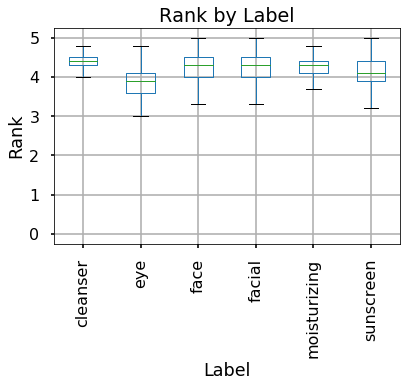

In [12]:
#Rank by Label
skin.boxplot('rank', by='label', rot=90)
plt.xlabel('Label')
plt.ylabel('Rank')
plt.title('Rank by Label')
plt.suptitle('')
plt.show()

Here are the average prices of different labels:

In [13]:
skin.groupby(['label'])['price'].mean()

label
cleanser        34.511706
eye             63.337963
face            43.570268
facial          75.780000
moisturizing    69.548333
sunscreen       47.800469
Name: price, dtype: float64

We created a scatter plot to look at the relationship between ranking and price. Notice how the data is right-skewed. There is a weak correlation between price and rank, showing that prices vary no matter the rank, and that there are generally more rankings above 3.

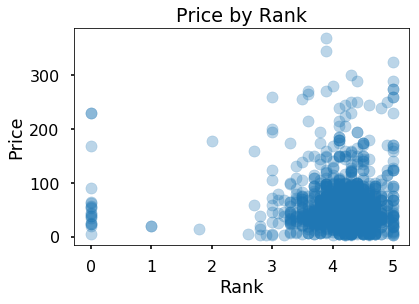

In [14]:
plt.scatter(x=skin['rank'],y=skin["price"], alpha=0.3)
plt.xlabel('Rank')
plt.ylabel('Price')
plt.title('Price by Rank')
plt.show()

****
### Analyses using models:
- Linear Regression
- Train-Test Split
- Logistic Regression

In [15]:
by_eye=skin[skin['label']=='eye'].sort_values(by=['price'])


In [16]:
skin.shape

(1630, 17)

For the purposes of our evaluation, we decided to drop all of the entries that contain a NaN.

In [17]:
skin=skin.dropna()

****
### Pre-Registration Analyses

1. To determine **whether high-end products have differential ratings from drugstore and mid-price items**, we will perform a T-test of the mean ratings between these price points. We will also perform linear regression and possibly k-means clustering, if applicable. For the linear regression, ratings will be the dependent variable and price will be the independent variable.



First, we performed the T test for rank. In this hypothesis test, our null hypothesis is that there is no statistically siginificant difference between the mean rank of low-to-midend products and high-end products. Our alternative hypothesis is that there is a statistically significant difference between the prices of these two groups of products. We will then carry out the T test, assuming that the null hypothesis is true. We will be using a significant level of 0.05.

In [18]:
#From the summary of skin df: 75th percentile of price is $68, we will use that as our cutoff for "high-end" products
highend=skin.loc[(skin['price']>=68)]
low_midend=skin.loc[(skin['price']<68)]
print(stats.levene(highend['rank'], low_midend['rank']))
#Recall that the Independent Samples t Test requires the assumption of homogeneity of variance 
#The small p-value suggests that the populations do not have equal variances.

LeveneResult(statistic=0.22491333359738705, pvalue=0.6353852737521644)


In [19]:
ttest= stats.ttest_ind(highend['rank'], low_midend['rank'], equal_var= True)
print(ttest)

Ttest_indResult(statistic=-0.017780036522044695, pvalue=0.9858165175302454)


From the summary statistics that we found for the skin dataset, the 75th percentile of price is $68, so we used that as our cutoff for what we consider "high-end" products.

The p-value for this test is 0.986. Since our p-value is not smaller than our significant level of 0.05, we fail to reject null hypoethesis. In other words, there is no statistically significant difference between the mean rank of low-to-midend products and high-end products.

In [20]:
#Linear Regression model regressing rank on price
rankonprice_regression = LinearRegression()
rankonprice_regression.fit(skin[['price']], skin['rank'])
print('Coefficient for the predictor is' , rankonprice_regression.coef_[0])
score=rankonprice_regression.score(skin[['price']], skin['rank'])
print('R squared value for the multiple linear regression is', score)

Coefficient for the predictor is -0.0003648454769423625
R squared value for the multiple linear regression is 0.0006952538339040082


The coefficient value -0.0004 tells us that for every $1 increase in a product's price, the rank of that product decreases by 0.0004 units, ceteris paribus.

In [21]:
#using statsmodels package to see p-value --> https://www.statsmodels.org/devel/example_formulas.html 

mod = smf.ols(formula='rank ~ price', data=skin)

results = mod.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.128
Date:                Wed, 28 Apr 2021   Prob (F-statistic):              0.288
Time:                        19:51:26   Log-Likelihood:                -1501.6
No. Observations:                1624   AIC:                             3007.
Df Residuals:                    1622   BIC:                             3018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1832      0.024    171.573      0.0

As we can see from the table, the p-value for this regression is 0.288. This is statistically insignificant at the 5% level.The R-squared value of 0.001 is very low, indicating that price and rank of products are not highly correlated. 

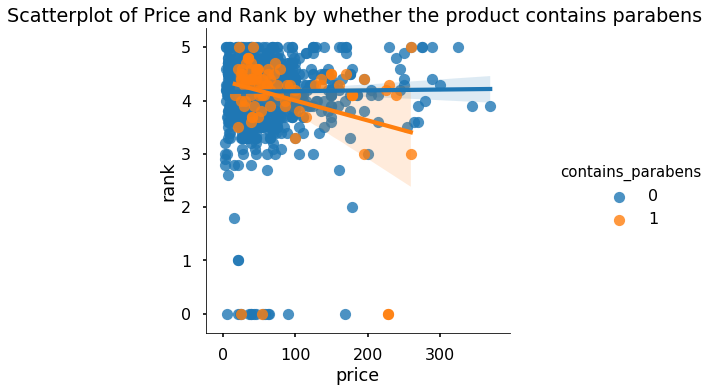

In [22]:
#Scatterplot of price and rank by existence of parabens or not
sns.lmplot(x='price', y='rank', data=skin, hue='contains_parabens')
# model2 = LinearRegression()
# model2.fit(skin[['price']],skin['rank']) #x=price y=rank How price affects rank
plt.title('Scatterplot of Price and Rank by whether the product contains parabens ')
plt.show()
# print('Coefficient for this model is ', model2.coef_[0])
# score=model2.score(skin[['price']], skin['rank'])
# print('The R squared value for this model is ', score)

The scatterplot shows that there is not a significant distinction between price and rank based on if a product contains parabens or not. The orange points (products containing parabens) appear to overlap with the blue points (products not containing parabens) which further supports this result. The orange line indicating the slope of the relationship between price and rank of products that contain parabens is negative which means that as price increases, rank decreases for products that contain parabens. The blue slope is slightly positive, indicating a positive relationship between price and rank for products that don't contain parabens. This could be because there are more products in our dataset that do not contain paraben than those that do. 

2. Next, **we will examine parabens**. In the ‘ingredients’ column of the datasets, we will index to find all the products that contain parabens such as methylparabens and ethylparabens. We will then perform two linear regressions: one with price as the outcome and a second with rating as the outcome. The predictor variables for these regressions will be a dummy variable indicating if the product contains parabens, price/rating (whichever is not the dependent variable), and skin type dummy variables. 

In [23]:
#linreg price on contains parabens, rating, and skin dummy 
#using statsmodels package to see p-value --> https://www.statsmodels.org/devel/example_formulas.html 


mod = smf.ols(formula='price ~ contains_parabens + rank + normal+  oily + combination + dry + sensitive + full + natural + matte + light + radiant', data=skin)

results = mod.fit()

print('OLS Results with Price as Dependent Variable:' )
print('\n')
print(results.summary())

OLS Results with Price as Dependent Variable:


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     5.078
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           2.26e-08
Time:                        19:51:27   Log-Likelihood:                -8423.4
No. Observations:                1624   AIC:                         1.687e+04
Df Residuals:                    1611   BIC:                         1.694e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

The coefficient on containing parabens was 25.93 with a p-value of 0. This means that on average, a product that contains parabens has a price $25.93 greater than a product that does not contain parabens in its ingredient list, ceteris paribus. 

In [24]:
#linreg rank on contains parabens, price, and skin dummy 
#using statsmodels package to see p-value --> https://www.statsmodels.org/devel/example_formulas.html 



mod = smf.ols(formula='rank ~ contains_parabens + price + normal + oily + combination + dry + sensitive + full + natural + matte + light + radiant', data=skin)

results = mod.fit()

print('OLS Results with Rank as Dependent Variable:' )
print('\n')
print(results.summary())

OLS Results with Rank as Dependent Variable:


                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.329
Date:                Wed, 28 Apr 2021   Prob (F-statistic):              0.195
Time:                        19:51:27   Log-Likelihood:                -1494.2
No. Observations:                1624   AIC:                             3014.
Df Residuals:                    1611   BIC:                             3084.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

The coefficient on containing parabens was -0.0795 with a p-value of 0.235. This means that on average, a product that contains parabens has a ranking of 0.0795 units lower than a product that does not contain parabens. 

**** 
### Additional Analyses

### Linear regression model

In this section, we will perform a linear regression analysis to determine whether there is a linear relationship between the price of skincare products and likelihood that a product contains parabens. We will also examine if there is a linear relationship between price and rank (rating).

In [25]:
#Linear Regression model regressing parabens on price
from sklearn.linear_model import LinearRegression
price_regression = LinearRegression()
price_regression.fit(skin[['price']], skin['contains_parabens'])
print('Coefficient for the predictor is' , price_regression.coef_[0])
score=price_regression.score(skin[['price']], skin['contains_parabens'])
print('R squared value for the multiple linear regression is', score)

Coefficient for the predictor is 0.0007000940087116833
R squared value for the multiple linear regression is 0.018209682486593937


In [26]:
#using statsmodels package to see p-value --> https://www.statsmodels.org/devel/example_formulas.html 

mod = smf.ols(formula='contains_parabens ~ price', data=skin)

results = mod.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      contains_parabens   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     30.08
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           4.79e-08
Time:                        19:51:27   Log-Likelihood:                 105.85
No. Observations:                1624   AIC:                            -207.7
Df Residuals:                    1622   BIC:                            -196.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0165      0.009      1.818      0.0

The coefficient value 0.0007 tells us that for every $1 increase in a product's price, the probability that the product contains parabens increases by .07%, ceteris paribus. The p-value is 0, which indicates that this result is significant at the 5% level. 

However, the R-squared value is also very low, indicating that there is very weak positive relationship between a products price and the likelihood a product contains parabens. This suggests that linear regression is not a good model for these two variables. This is not surprising, since we are trying to fit a binary dependent variable on a continuous variable.

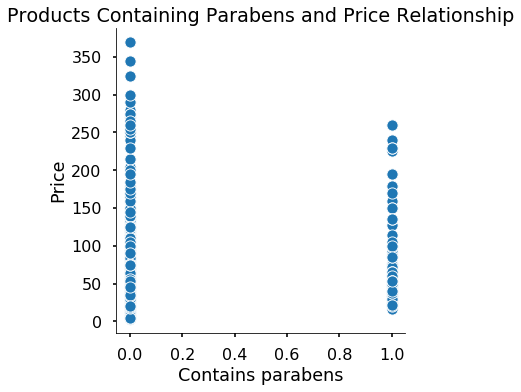

In [27]:
#plot parabens and price relationship
sns.relplot(data=skin, x='contains_parabens', y='price')
plt.title('Products Containing Parabens and Price Relationship')
plt.xlabel('Contains parabens')
plt.ylabel('Price')
plt.show()

This plot looks at the relationship between a product's price and whether that product contains parabens. As we can see, there doesn't appear to be any significant differences in prices between products that contain parabens and products that don't contain parabens. The range of prices for products that do not contain parabens is larger than the range of prices for products that do contain parabens; however, there are not any clear price distinctions that we can see. 

## Linear regression with price and labels as predictors and rank as the outcome

In [28]:
dummies=pd.get_dummies(skin['label'])
skin=skin.copy()
skin['eye']=dummies['eye']
skin['moisturizing']=dummies['moisturizing']
skin['sunscreen']=dummies['sunscreen']
skin['cleanser']=dummies['cleanser']
skin['facial']=dummies['facial']
skin['face']=dummies['face']

In order to perform the linear regression, we first created dummy variables for all of the product labels. We then fit the linear regression using rank as the outcome and the labels and price as the predictors.

Estimated coefficients for this model for price, eye, moisturizing, sunscreen, cleanser, facial and face respectively are [-1.85107670e-04 -3.23512035e-01  1.25642905e-01 -7.40276854e-02
  1.52556066e-01  7.81984887e-02  4.11422606e-02]


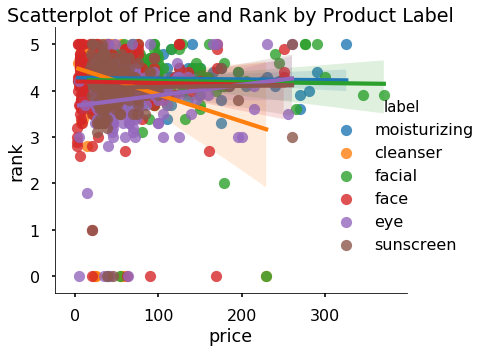

In [29]:
#linear regression with price and labels as predictors and rank as outcome
sns.lmplot(x='price', y='rank', data=skin, hue='label')

model2 = LinearRegression()
model2.fit(skin[['price', 'eye', 'moisturizing', 'sunscreen', 'cleanser', 'facial', 'face']],skin['rank'])
print('Estimated coefficients for this model for price, eye, moisturizing, sunscreen, cleanser, facial and face respectively are', model2.coef_)
plt.title('Scatterplot of Price and Rank by Product Label')
plt.tight_layout()

As we can see from the plot and the coefficient values, there is not a strong linear relationship between rank and any of our predictor variables. One thing to note is that the orange line (cleanser products) and the purple line (eye products) appear to have different relationships between price and rank than the other predictors. It appears that rank and price of cleanser products have a negative relationship; whereas, the rank and price of eye products have a slightly positive relationship.

While we had previously planned to perform K-means clustering using labels, we can see from this plot that this would not be a suitable model.

## Train-Test Split Evaluation

#### In this section, we split the data into train and test sets and evaluate the performance of our training set. 

Train-Test Split for predicting whether a product contains parabens, given the price

In [30]:
x_train, x_test = train_test_split(skin, test_size=0.2)
print('Training set')
print(x_train.head())
print('\n')
print('Test set')
print(x_test.head())

Training set
          label         brand  \
738      facial  ESTÉE LAUDER   
1455  sunscreen      SMASHBOX   
1487  sunscreen    SUPERGOOP!   
1262        eye      SHISEIDO   
923        face      GLAMGLOW   

                                                   name  price  rank  \
738   Advanced Night Repair Intensive Recovery Ampoules  115.0   4.9   
1455  Camera Ready CC Cream Broad Spectrum SPF 30 Da...   42.0   3.9   
1487                        City Sunscreen Serum SPF 30   42.0   4.1   
1262          Bio-Performance LiftDynamic Eye Treatment   72.0   3.9   
923                     THIRSTYMUD™ Hydrating Treatment   59.0   4.3   

                                            ingredients  normal  oily  \
738   Advanced Night Rpr Int Rcv Ampoule Division: E...       1     1   
1455  Octinoxate 7.50%, Octisalate 4.00%, Oxybenzone...       1     1   
1487  -Homosalate 8%, Octisalate 4%, Avobenzone 3%, ...       1     1   
1262  -Exclusive TruStructiv™ Technology: Helps harn...       1

In [31]:
lregression = LogisticRegression().fit(x_train[['price']], x_train['contains_parabens'])
print('Logistic Regression Coefficient is ', lregression.coef_[0][0])
y_pred = lregression.predict(x_test[['price']])
b=np.sum(y_pred==x_test['contains_parabens'])/len(y_pred)
answer=(b*100).round(1)
print('Prediction accuracy of this model is',answer,'%')

Logistic Regression Coefficient is  0.008438319049447425
Prediction accuracy of this model is 94.5 %


In other words, the model will predict whether a product contains parabens based on the price of the product 93.5% of the time. Although this is a very high accuracy, we must keep in mind that a small proportion of our products actually contain parabens. This might mean that there is not a sufficient number of records with parabens, and therefore there is not actually enough data in the test set to properly evaluate the model performance. In terms of the bigger picture, both our train and test datasets are most likely not suitable representations of the problem domain.

### Train-Test Split for predicting whether a product contains parabens, given the rank

In [32]:
x_train2, x_test2 = train_test_split(skin, test_size=0.8)
print('Training set')
print(x_train2.head())
print('\n')
print('Test set')
print(x_test2.head())

Training set
         label         brand                                             name  \
1066      face      CLINIQUE  City Block Purifying Charcoal Clay Mask + Scrub   
674     facial      GLAMGLOW               YOUTHMUD™ Tinglexfoliate Treatment   
519   cleanser         BELIF                       Cleansing Gel Oil Enriched   
1059      face        LA MER                The Lifting and Firming Mask Mini   
969       face  OLEHENRIKSEN                            Cold Plunge Pore Mask   

      price  rank                                        ingredients  normal  \
1066   28.0   4.7  Water , Kaolin , Butylene Glycol , Silica , Ma...       1   
674    59.0   4.1  Water, Montmorillonite, Kaolin, Magnesium Alum...       1   
519    34.0   4.5  -Semen Benincasae Herb: Creates a foamy textur...       1   
1059   75.0   5.0  Declustered Water (-)/Aqua/Eau De-Structuree (...       0   
969    36.0   4.6  -Clay: Aids in purifying pores.\n-Snow Lotus a...       1   

      oily  combina

In [33]:
logfit= LogisticRegression().fit(x_train2[['rank']], x_train2['contains_parabens'])
print('Logistic Regression Coefficient is ', logfit.coef_[0][0])
testscore = logfit.score(x_test2[['rank']],x_test2['contains_parabens'])
print('Prediction accuracy of the model is: {:.1%}'.format(testscore))


Logistic Regression Coefficient is  -0.21631158298615458
Prediction accuracy of the model is: 94.1%


Here, we see another high prediction accuracy. The model will predict whether a product contains parabens based on the rank of the product 94.7% of the time. To understand this high number, we can apply the same explanation as we did above with price as the predictor variable. 

# Logistic regression

In this section, we will be using logistic regression to predict the probability of a product containing parabens, given its rank or price. First, we will fit the logistic regression model.

In [34]:
skin_model = LogisticRegression().fit(skin[['price']], skin['contains_parabens'])
print('Coefficient: ', skin_model.coef_[0][0])
print('Intercept: ', skin_model.intercept_[0])

Coefficient:  0.00857048810600534
Intercept:  -3.391968976202471


We then need to define a function that will calculate logit

In [35]:
def logit(x):
    return np.exp(x) / (np.exp(x) + 1)

In [36]:
m = skin_model.coef_[0][0]
b = skin_model.intercept_[0]
price = 80
x = m * price + b
print('Probability that a product that costs $80 contains parabens is:', logit(x))

price2 = 81
x2 = m * price2 + b
print('Probability that a product that costs $81 contains parabens is:', logit(x2))

price3 = 82
x3 = m * price3 + b
print('Probability that a product that costs $82 contains parabens is:', logit(x3))
# print ('\n')
# print('Difference in probability between a product that costs $82 and $81: ',np.round(logit(x3)-logit(x2),4))
# print('Difference in probability between a product that costs $81 and $80: ',np.round(logit(x2)-logit(x),4))

Probability that a product that costs $80 contains parabens is: 0.06260087316261226
Probability that a product that costs $81 contains parabens is: 0.06310569592973611
Probability that a product that costs $82 contains parabens is: 0.06361431339664672


As price increases, the probability that the product will contain parabens also increases. 

Lets now use our function to predict the probability of a product containing parabens, given each rank.

In [37]:
skin_model_rank = LogisticRegression().fit(skin[['rank']], skin['contains_parabens'])
print('Coefficient: ', skin_model_rank.coef_[0][0])
print('Intercept: ', skin_model.intercept_[0])
m = skin_model_rank.coef_[0][0]
b = skin_model_rank.intercept_[0]
rank = 1
x = m * rank + b
print('Probability of a product with rank 1 containing parabens:', logit(x))

rank2 = 2
x = m * rank2 + b
print('Probability of a product with rank 2 containing parabens:', logit(x))

rank3 = 3
x = m * rank3 + b
print('Probability of a product with rank 3 containing parabens:', logit(x))

rank4 = 4
x = m * rank4 + b
print('Probability of a product with rank 4 containing parabens:', logit(x))

rank5 = 5
x = m * rank5 + b
print('Probability of a product with rank 5 containing parabens:', logit(x))

Coefficient:  -0.19987697904613494
Intercept:  -3.391968976202471
Probability of a product with rank 1 containing parabens: 0.09875631942698292
Probability of a product with rank 2 containing parabens: 0.08233793537803043
Probability of a product with rank 3 containing parabens: 0.06844184335415544
Probability of a product with rank 4 containing parabens: 0.0567459578356219
Probability of a product with rank 5 containing parabens: 0.04694802968666038


As the rank increases, the probability that the product will contain parabens decreases. 

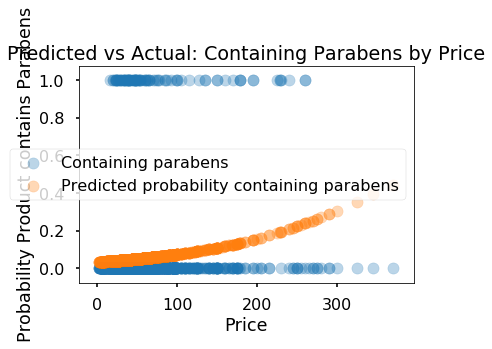

In [38]:
# plot
#  data
plt.scatter(
    skin.price, 
    skin.contains_parabens, 
    alpha = 0.3,
    label='Containing parabens'
)

#  logit probability of class 1
plt.scatter(
    skin.price, 
    skin_model.predict_proba(skin[['price']])[:,1], 
    alpha = 0.3,
    label='Predicted probability containing parabens'
)
plt.xlabel('Price')
plt.ylabel('Probability Product contains Parabens')
plt.title('Predicted vs Actual: Containing Parabens by Price')
plt.legend()
plt.show()

******
## Evaluation of Significance: T-Test (difference in means by parabens)

#### In this section, we performed a T-Test for the difference in means between the prices and the rank of the products with and without parabens. 

### 1. Price

##### First, we performed the T test for price. In this hypothesis test, our null hypothesis is that there is no statistically siginificant difference between the price of products with parabens and the price of products without parabens. Our alternative hypothesis is that there is a statistically significant difference between the prices of these two groups of products. We will then carry out the T test, assuming that the null hypothesis is true. We will be using a significant level of 0.05.

In [39]:
subset1=skin.loc[(skin['contains_parabens']==0)]
subset2=skin.loc[(skin['contains_parabens']==1)]
print(stats.levene(subset1['price'], subset2['price']))


LeveneResult(statistic=19.884618604014115, pvalue=8.790982879544669e-06)


Since our levene result has a P value that is smaller than the significance level of 0.05, this means that the two subsets do NOT have equal variance.

In [40]:
ttest= stats.ttest_ind(subset1['price'], subset2['price'], equal_var= False)
print(ttest)

Ttest_indResult(statistic=-3.8017928828589134, pvalue=0.0002557009244026851)


The p value for this test is 0.0002557. Since our P value is  less than our significant level of 0.05, we reject the null hypothesis and accept the alternative hypothesis. In other words, there is a statistically significant difference between the mean price of products with and without parabens.

### Bootstrap resampling

In order to get an even better sense of whether there is truly a significant difference in the rank and price of products with and without parabens, we decided to do a bootstrap resampling and recalculate the P value using our new sample. Here, we will resample our data with replacement 10000 times to get a sense of what our data might have looked like if we looked at a wider range of similar products.

In [41]:
skin.sample(n=len(skin), replace=True)
bootstraps = 10000
for i in range(bootstraps):
    resampled= skin.sample(n=len(skin), replace=True)

subset_rank_resample=resampled.loc[(resampled['contains_parabens']==0)]
subset_rank2_resample=resampled.loc[(resampled['contains_parabens']==1)]
#Recall that the Independent Samples t Test requires the assumption of homogeneity of variance 
#The small p-value suggests that the populations do not have equal variances.
print(stats.levene(subset_rank_resample['price'], subset_rank2_resample['price']))
ttest= stats.ttest_ind(subset_rank_resample['price'], subset_rank2_resample['price'], equal_var= False)
print(ttest)

LeveneResult(statistic=35.7543061806907, pvalue=2.7475517269305136e-09)
Ttest_indResult(statistic=-4.361039081810816, pvalue=3.674661429211384e-05)


In this bootstraped resampling, the P value is also below the critical 0.05 value. We therefore again can reject the null hypothesis in favor of the alternative hypothesis. There is strong evidence that there is a statistically significant difference between the mean price of products containing parabens and the mean price of products without parabens.

### 2. Rank

##### We will now perform the same hypothesis test for rank. The null hypothesis is that there is no statistically siginificant difference between the rank of products with parabens and the rank of products without parabens. Our alternative hypothesis is that there is a statistically significant difference between the prices of these two groups of products. We will then carry out the T test, assuming that the null hypothesis is true. We will be using a significant level of 0.05.

In [42]:
subset_rank=skin.loc[(skin['contains_parabens']==0)]
subset_rank2=skin.loc[(skin['contains_parabens']==1)]
#Recall that the Independent Samples t Test requires the assumption of homogeneity of variance 
#The small p-value suggests that the populations do not have equal variances.
print(stats.levene(subset_rank['rank'], subset_rank2['rank']))

LeveneResult(statistic=4.384405535042871, pvalue=0.036424038528475845)


Since our levene result has a small P value of 0.0364 this means that the two subsets do not have equal variance.

In [43]:
ttest= stats.ttest_ind(subset_rank['rank'], subset_rank2['rank'], equal_var= False)
print(ttest)

Ttest_indResult(statistic=0.9384312147021012, pvalue=0.3504564942809779)


The p value for this test is 0.350. Since our P value is not smaller than our significant level of 0.05, we fail to reject null hypoethesis. In other words, there is no statistically significant difference between the mean rank of products with and without parabens.

## T-Test for rank using bootstrapped sample

Just like we did with price, we will now resample the data again using the bootstrap resampling method and run the hypothesis test again. The null and alternative hypotheses are the same.

In [44]:
skin.sample(n=len(skin), replace=True)
bootstraps = 10000
for i in range(bootstraps):
    resampled= skin.sample(n=len(skin), replace=True)

subset_rank_resample=resampled.loc[(resampled['contains_parabens']==0)]
subset_rank2_resample=resampled.loc[(resampled['contains_parabens']==1)]
#Recall that the Independent Samples t Test requires the assumption of homogeneity of variance 
#The small p-value suggests that the populations do not have equal variances.
print(stats.levene(subset_rank_resample['rank'], subset_rank2_resample['rank']))
ttest= stats.ttest_ind(subset_rank_resample['rank'], subset_rank2_resample['rank'], equal_var= False)
print(ttest)

LeveneResult(statistic=0.0006673696190381419, pvalue=0.9793933209960645)
Ttest_indResult(statistic=-0.5637771695620197, pvalue=0.5742559804984295)


Same conclusion, with a large p-value of 0.402 that's greater than .05, we fail to reject the null hypothesis. There is no statistical difference in rank of products with and without parabens.

**We reject the null hypothesis for the difference in prices between products with and without parabens. We can therefore say that there appears to be evidence for a difference in price between skin care products with and without parabens. But for which types of products is this difference in price most significant? We therefore decided to subset our data and perform the hypothesis test on each label category, to see whether there is a significant difference in price.**

## 1. Eye products

#####  In this hypothesis test, our null hypothesis is that there is no statistically siginificant difference between the price of eye products with parabens and the price of products without parabens. Our alternative hypothesis is that there is a statistically significant difference between the prices of these two groups of products. We will then carry out the T test, assuming that the null hypothesis is true. We will be using a significant level of 0.05.

In [45]:
#parabens by label = eye
#by_eye=skin[skin['label']=='eye'].sort_values(by=['price'])
by_eye.groupby(['contains_parabens'])['price'].mean()

contains_parabens
0    62.887255
1    71.000000
Name: price, dtype: float64

In [46]:
subset1=by_eye.loc[(by_eye['contains_parabens']==0)]
subset2=by_eye.loc[(by_eye['contains_parabens']==1)]

print(stats.levene(subset1['price'], subset2['price']))
ttest= stats.ttest_ind(subset1['price'], subset2['price'], equal_var= True)
print(ttest)

LeveneResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)


The p-value for this t-test is 0.512. Since our p-value is not less than our significant level of 0.05, we fail to reject null hypoethesis. In other words, there is no statistically significant difference between the mean price of eye products with and without parabens.

## 2. Moisturizing Products

#####  In this hypothesis test, our null hypothesis is that there is no statistically siginificant difference between the price of moisturizing products with parabens and the price of products without parabens. Our alternative hypothesis is that there is a statistically significant difference between the prices of these two groups of products. We will then carry out the T test, assuming that the null hypothesis is true. We will be using a significant level of 0.05.

In [47]:
#parabens by label = moisturizing
moisturizing = skin[skin['label']=='moisturizing'].sort_values(by=['price'])
moisturizing.groupby(['contains_parabens'])['price'].mean()

contains_parabens
0     65.722420
1    116.323529
Name: price, dtype: float64

In [48]:
subset1=moisturizing.loc[(moisturizing['contains_parabens']==0)]
subset2=moisturizing.loc[(moisturizing['contains_parabens']==1)]

print(stats.levene(subset1['price'], subset2['price']))
ttest= stats.ttest_ind(subset1['price'], subset2['price'], equal_var= False)
print(ttest)

LeveneResult(statistic=7.85427341551101, pvalue=0.005404608542004259)
Ttest_indResult(statistic=-2.9105028858405384, pvalue=0.009799211780249105)


The p value for this t-test is 0.0098. Since our P value is less than our significant level of 0.05, we reject null hypoethesis and accept the alternative hypothesis. In other words, there is statistically significant difference between the mean price of moisturizing products with and without parabens.

## 3. Facial products

#####  In this next hypothesis test, our null hypothesis is that there is no statistically siginificant difference between the price of facial products with parabens and the price of products without parabens. Our alternative hypothesis is that there is a statistically significant difference between the prices of these two groups of products. We will then carry out the T test, assuming that the null hypothesis is true. We will be using a significant level of 0.05.

In [49]:
#facial
facial = skin[skin['label']=='facial'].sort_values(by=['price'])
facial.groupby(['contains_parabens'])['price'].mean()

contains_parabens
0    75.419929
1    81.105263
Name: price, dtype: float64

In [50]:
subset1=facial.loc[(facial['contains_parabens']==0)]
subset2=facial.loc[(facial['contains_parabens']==1)]

print(stats.levene(subset1['price'], subset2['price']))
ttest= stats.ttest_ind(subset1['price'], subset2['price'], equal_var= True)
print(ttest)

#facial within label is NOT significant for parabens and price

LeveneResult(statistic=0.3985481367304362, pvalue=0.5283239413447972)
Ttest_indResult(statistic=-0.45318306112280005, pvalue=0.650746725103712)


The p value for this t-test is 0.65. Since our P value is not less than our significant level of 0.05, we fail to reject null hypoethesis. There is not a statistically significant difference between the mean price of facial products with and without parabens.

## 4. Face Products

#####  In this next hypothesis test, our null hypothesis is that there is no statistically siginificant difference between the price of face products with parabens and the price of products without parabens. Our alternative hypothesis is that there is a statistically significant difference between the prices of these two groups of products. We will then carry out the T test, assuming that the null hypothesis is true. We will be using a significant level of 0.05.

In [51]:
#face
face = skin[skin['label']=='face'].sort_values(by=['price'])
face.groupby(['contains_parabens'])['price'].mean()

contains_parabens
0    42.530616
1    94.166667
Name: price, dtype: float64

In [52]:
subset1=face.loc[(face['contains_parabens']==0)]
subset2=face.loc[(face['contains_parabens']==1)]

print(stats.levene(subset1['price'], subset2['price']))
ttest= stats.ttest_ind(subset1['price'], subset2['price'], equal_var= True)
print(ttest)

#face within label is significant for parabens and price 

LeveneResult(statistic=1.9186606028475492, pvalue=0.16704737694805546)
Ttest_indResult(statistic=-3.2174216349369, pvalue=0.0014369371683882598)


The p value for this t-test is 0.0014. Since our P value is  less than our significant level of 0.05, we reject null hypoethesis and accept the alternative hypothesis. There is a statistically significant difference between the mean price of face products with and without parabens.

## 5. Cleanser products

In [53]:
#cleanser
cleanser = skin[skin['label']=='cleanser'].sort_values(by=['price'])
cleanser.groupby(['contains_parabens'])['price'].mean()

contains_parabens
0    32.936594
1    53.413043
Name: price, dtype: float64

In [54]:
subset1=cleanser.loc[(cleanser['contains_parabens']==0)]
subset2=cleanser.loc[(cleanser['contains_parabens']==1)]

print(stats.levene(subset1['price'], subset2['price']))
ttest= stats.ttest_ind(subset1['price'], subset2['price'], equal_var= False)
print(ttest)

#cleanser within label is significant for parabens and price

LeveneResult(statistic=10.800194015457766, pvalue=0.0011365998895944938)
Ttest_indResult(statistic=-1.921141764644511, pvalue=0.06747543125950599)


The p value for this t-test is 0.067. Since our P value is not less than our significant level of 0.05, we fail to reject null hypoethesis. There is not a statistically significant difference between the mean price of cleanser products with and without parabens.

## 6. Sunscreen products

In [55]:
#sunscreen
sunscreen = skin[skin['label']=='sunscreen'].sort_values(by=['price'])
sunscreen.groupby(['contains_parabens'])['price'].mean()

contains_parabens
0    45.637500
1    81.076923
Name: price, dtype: float64

In [56]:
subset1=sunscreen.loc[(sunscreen['contains_parabens']==0)]
subset2=sunscreen.loc[(sunscreen['contains_parabens']==1)]

print(stats.levene(subset1['price'], subset2['price']))
ttest= stats.ttest_ind(subset1['price'], subset2['price'], equal_var= False)
print(ttest)

#sunscreen within label is significant for parabens and price

LeveneResult(statistic=13.464037707246119, pvalue=0.00030798882708884314)
Ttest_indResult(statistic=-1.578057620875347, pvalue=0.14024803532395327)


The p value for this t-test is 0.140. Since our P value is not less than our significant level of 0.05, we fail to reject null hypoethesis. There is not a statistically significant difference between the mean price of sunscreen products with and without parabens.

## Summary of Evaluation

**Statistically Significant Difference**: 
- Moisturizing
- Face

**Not Significant**:
- Facial
- Sunscreen
- Cleanser
- Eye

## Limitations of hypothesis tests: Type I and Type II Errors

# Multiple Regression

## Multiple regression with skin type as predictors and parabens as outcome

In [57]:
#LPM: Regress Parabens on Skin-types
mod = smf.ols(formula='contains_parabens ~ normal+  oily + combination + dry + sensitive + full + natural + matte + light + radiant', data=skin)

results = mod.fit()

print('OLS Results: Regress Parabens on Skin-types' )
print('\n')
print(results.summary())

OLS Results: Regress Parabens on Skin-types


                            OLS Regression Results                            
Dep. Variable:      contains_parabens   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9182
Date:                Wed, 28 Apr 2021   Prob (F-statistic):              0.515
Time:                        19:51:41   Log-Likelihood:                 95.532
No. Observations:                1624   AIC:                            -169.1
Df Residuals:                    1613   BIC:                            -109.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Inte

As seen by the large p-values, there are no statistically significant skin-types that predict whether a product has parabens or not. 

## Multiple regression with labels as predictors and parabens as outcome

In [58]:
#LPM: Regress Parabens on product labels
#took face out to avoid multicollinearity
mod = smf.ols(formula='contains_parabens ~ eye + moisturizing + sunscreen + cleanser + facial ', data=skin)

results = mod.fit()

print('OLS Results: Regress Parabens on Product Labels' )
print('\n')
print(results.summary())

OLS Results: Regress Parabens on Product Labels


                            OLS Regression Results                            
Dep. Variable:      contains_parabens   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.052
Date:                Wed, 28 Apr 2021   Prob (F-statistic):             0.0688
Time:                        19:51:41   Log-Likelihood:                 96.055
No. Observations:                1624   AIC:                            -180.1
Df Residuals:                    1618   BIC:                            -147.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

All product-labels products, on average, have a greater likelihood of containing parabens relative to the face-label category. These are all statistically significant at the .05 level, with the exception of eye products. 

## Logistic regression with parabens as outcome and skin types as predictors

In [59]:
model5 = LogisticRegression()
model5.fit(skin[['normal','oily','combination','dry','sensitive','full','natural','matte','light','radiant']],
           skin['contains_parabens'])
print('Coefficients for normal, oily, combination, dry, sensitive, full, natural, matte, light, and radiant skin, repectively: ', model5.coef_)

Coefficients for normal, oily, combination, dry, sensitive, full, natural, matte, light, and radiant skin, repectively:  [[-0.21330387 -0.03031323 -0.39096033  0.08823893 -0.08125788 -0.18973739
  -0.14797609 -0.21851763 -0.28788587 -0.12097241]]


In [60]:
#logistic regression with parabens as outcome and labels as predictors
model6 = LogisticRegression()
model6.fit(skin[['eye', 'moisturizing', 'sunscreen', 'cleanser', 'facial', 'face']], skin['contains_parabens'])
print('Coefficients for eye, moisturizing, sunscreen, cleanser, facial, and face products, respectively: ', model6.coef_)
#how to plot??

Coefficients for eye, moisturizing, sunscreen, cleanser, facial, and face products, respectively:  [[ 0.05366714  0.08142019  0.14631592  0.38834028  0.18720387 -0.85689179]]


## Linear regression with rank as outcome and skin types as predictors

In [61]:
#Regress rank on Skin-types
mod = smf.ols(formula='rank ~ normal+  oily + combination + dry + sensitive + full + natural + matte + light + radiant', data=skin)

results = mod.fit()

print('OLS Results: Regress Rank on Skin-types' )
print('\n')
print(results.summary())

OLS Results: Regress Rank on Skin-types


                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.284
Date:                Wed, 28 Apr 2021   Prob (F-statistic):              0.234
Time:                        19:51:41   Log-Likelihood:                -1495.7
No. Observations:                1624   AIC:                             3013.
Df Residuals:                    1613   BIC:                             3073.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercep

On average, skin products for normal skin have a 0.258 unit higher ranking than products that are not for normal skin. With a p-value of .009, this is a statistically significant finding. 

## Linear regression with price as outcome and skin types as predictors

In [62]:
# Regress price on Skin-types
mod = smf.ols(formula='price ~ normal+  oily + combination + dry + sensitive + full + natural + matte + light + radiant', data=skin)

results = mod.fit()

print('OLS Results: Regress Price on Skin-types' )
print('\n')
print(results.summary())

OLS Results: Regress Price on Skin-types


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.865
Date:                Wed, 28 Apr 2021   Prob (F-statistic):            0.00152
Time:                        19:51:42   Log-Likelihood:                -8439.3
No. Observations:                1624   AIC:                         1.690e+04
Df Residuals:                    1613   BIC:                         1.696e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Interce

On average, skin products for normal skin have a $17.96 higher prices than products that are not for normal skin. With a p-value of .011, this is a statistically significant finding.

On average, skin products for combination skin have a $18.76 lower prices than products that are not for combination skin. With a p-value of .010, this is a statistically significant finding.

On average, skin products for dry skin have a $13.30 higher prices than products that are not for dry skin. With a p-value of .006, this is a statistically significant finding.

On average, skin products for sensitive skin have a $6.55 lower prices than products that are not for sensitive skin. With a p-value of .042, this is a statistically significant finding.


## Linear regression with price as outcome and labels and rank as predictors

In [63]:
#price on label and rank
#took face label out to avoid multicolliearity
mod = smf.ols(formula='price ~ rank + eye + moisturizing + sunscreen + cleanser + facial ', data=skin)

results = mod.fit()

print('OLS Results: Regress Price on Rank and Product Labels' )
print('\n')
print(results.summary())

OLS Results: Regress Price on Rank and Product Labels


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     36.31
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           1.94e-41
Time:                        19:51:42   Log-Likelihood:                -8350.9
No. Observations:                1624   AIC:                         1.672e+04
Df Residuals:                    1617   BIC:                         1.675e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

On average, eye products, moisturizers, and facial product have a $19.43, $25.11, $32.24 higher prices relative to face product prices, repectively. These are all a statistically significant findings with p-values equal to 0.

On average, cleansers have a $8.96 lower price relative to face product prices. With a p-value of .009, this result is statistically significant. 


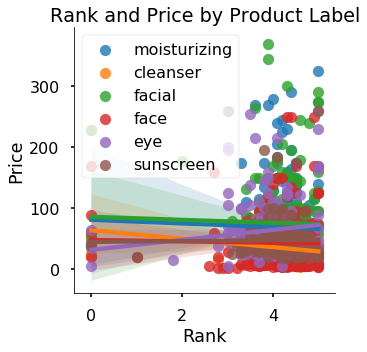

In [64]:
#plot x= rank y= price by label
sns.lmplot(x='rank', y='price', data=skin, hue='label', legend_out=False)
plt.title ('Rank and Price by Product Label')
plt.xlabel('Rank')
plt.ylabel('Price')
plt.tight_layout()
plt.legend(loc='best')

plt.show()

As you can see, this also does not look that pretty. It'd be better to at least keep the price as the predictor and rank as the outcome

******
## Interpretation and Conclusions 

******
## Ulta Dataset
In addition to the dataset derived from Sephora shown above, we also are exploring data from Ulta. Instead of six different labels of products such as moisturizer, cleanser, sunscreen, and other types of products, here we specifically look at moisturizers.

In [68]:
ulta = pd.read_csv('final_ulta.csv',encoding = "ISO-8859-1")
ulta.head()

,brand,name,price,rating,ingredients
0,It Cosmetics,Confidence In A Cream Anti-Aging Moisturizer,49.0,4.5,"Aqua (Water, Eau), Butylene Glycol, Cyclopenta..."
1,Clinique,Dramatically Different Moisturizing Lotion+,29.5,4.3,"Water / Aqua / Eau, Mineral Oil / Paraffinum L..."
2,Peter Thomas Roth,Water Drench Hyaluronic Cloud Cream Hydrating ...,52.0,4.4,"Water/Aqua/Eau, Glycerin, Dipropylene Glycol, ..."
3,ELEMIS,Pro-Collagen Marine Cream,128.0,4.5,"Aqua/Water/Eau, Glycerin, Caprylic/Capric Trig..."
4,StriVectin,SD Advanced Intensive Concentrate for Wrinkles...,139.0,4.5,"Aqua (Water, Eau), Glycerin, Pentaerythrityl T..."


### Exploratory Data Analysis
First we will calculate the average price and rating of these products to see the data that we are working with.

In [76]:
ulta_mean_price = ulta['price'].mean()
print('The average price of this data set is {:.2f}'.format(ulta_mean_price))

The mean price of this data set is: 39.33


In [78]:
ulta_mean_rating = ulta['rating'].mean()
print('The average rating of this data set is {:.2f}'.format(ulta_mean_rating))

The average rating of this data set is: 4.33


Then we need to see how many rows there are in total, with each row indicating a product.

In [79]:
ulta.shape

(603, 5)

The 'shape' tells us that there are 603 products in total. <br>
Next we need to drop rows where there are 'NaN' values:

In [83]:
ulta = ulta.dropna()
ulta.shape

(589, 5)

The number of rows changed, indicating that we have successfully dropped NaN values.

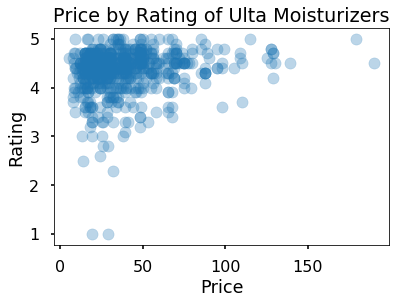

In [85]:
plt.scatter(x='price',y='rating',data=ulta, alpha=0.3)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Price by Rating of Ulta Moisturizers')
plt.show()

Most of the products are on the low-price and high-rating range, creating a cluster near the top-left corner of the graph.

C:\Users\ezoeg\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


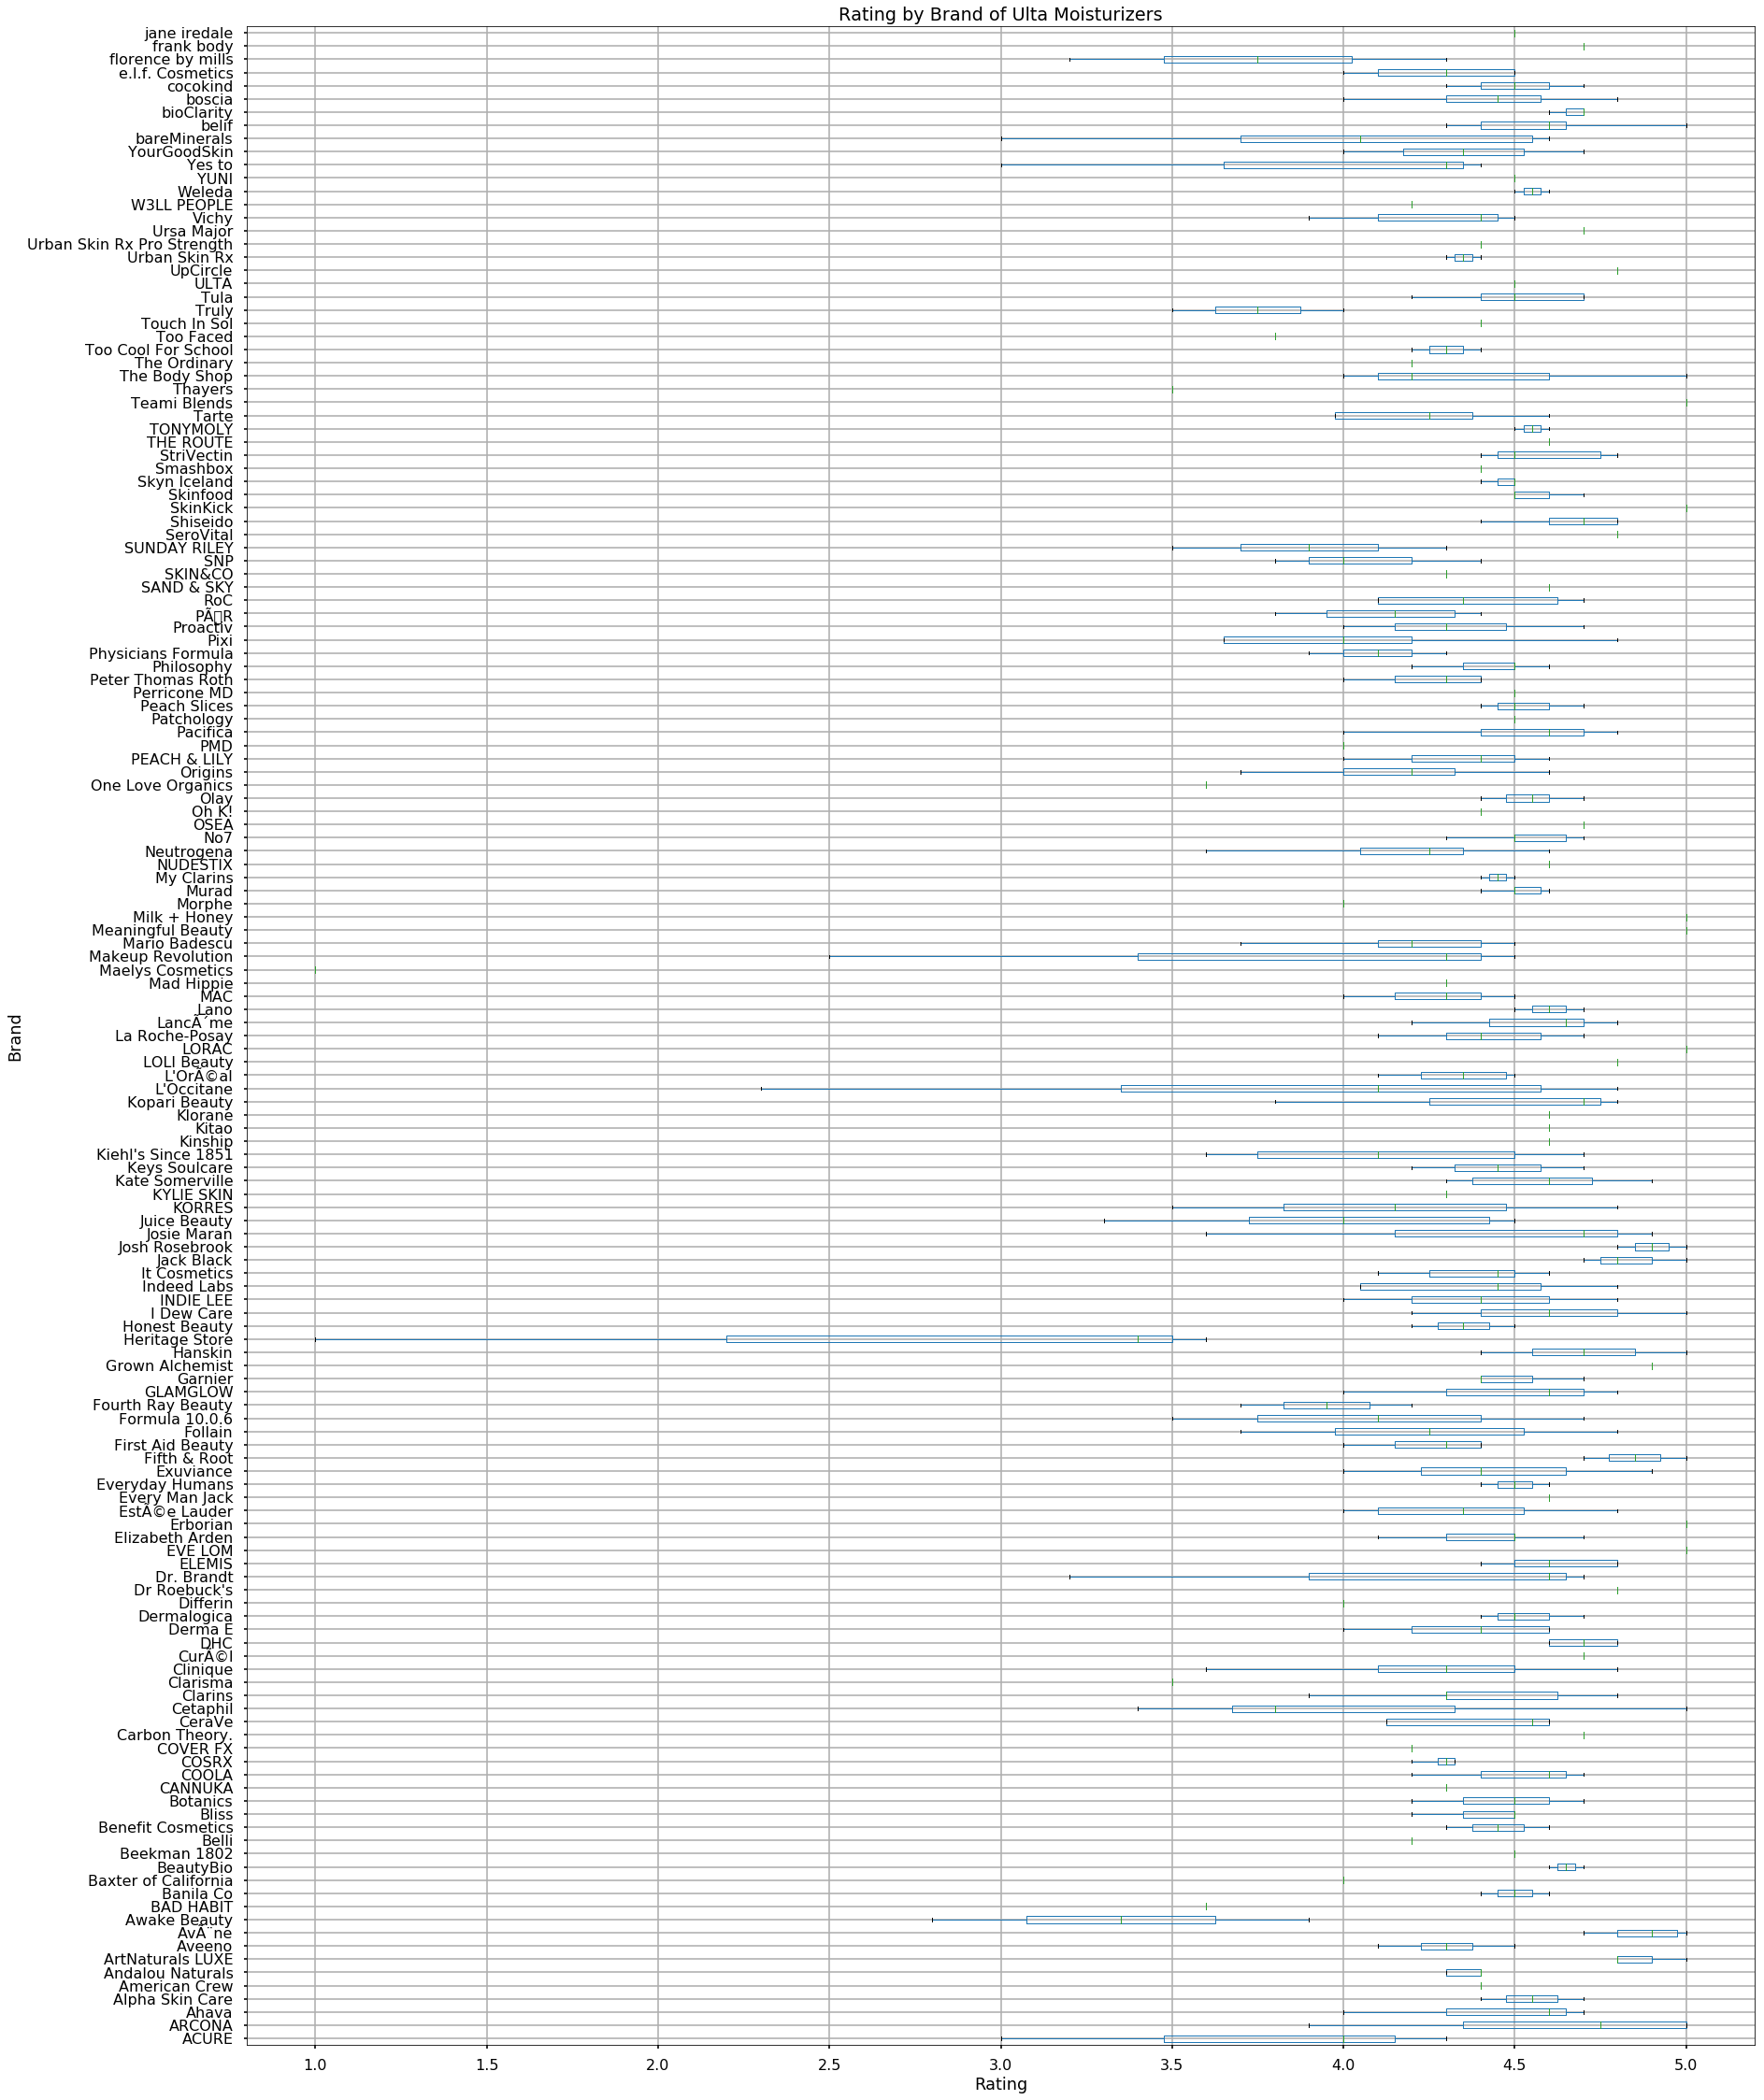

In [86]:
plot=ulta.boxplot('rating', by='brand', vert=False, figsize = (28,40))
plt.xlabel('Rating')
plt.ylabel('Brand')
plt.title('Rating by Brand of Ulta Moisturizers')
plt.suptitle('')
plt.show()

In [88]:
ulta['brand'].value_counts()

Clinique         38
Dermalogica      15
Mario Badescu    15
Origins          12
Clarins          12
                 ..
Belli             1
YUNI              1
ULTA              1
Klorane           1
THE ROUTE         1
Name: brand, Length: 153, dtype: int64

There are a total of 153 brands in this dataset.

In [109]:
ulta_price = ulta.groupby(['brand'])['price'].mean().reset_index()
ulta_rating = ulta.groupby(['brand'])['rating'].mean().reset_index()
ulta_rating = ulta_rating.rename(columns={'brand': 'drop_col'})
first_concat = pd.concat([ulta_price, ulta_rating], axis=1)
ulta_brands = first_concat[['brand','price','rating']]
ulta_brands.head()

,brand,price,rating
0,ACURE,18.158333,3.800000
1,ARCONA,62.750000,4.600000
2,Ahava,55.666667,4.433333
3,Alpha Skin Care,17.990000,4.550000
4,American Crew,18.000000,4.400000


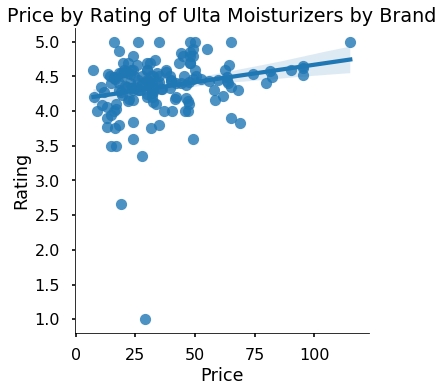

The slope between price and rating is 0.00502.


In [123]:
sns.lmplot(x='price',y='rating',data=ulta_brands)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Price by Rating of Ulta Moisturizers by Brand')
plt.show()

ulta_model = LinearRegression().fit(ulta_brands[['price']],ulta_brands['rating'])
slope = ulta_model.coef_[0]
print('The slope between price and rating is {:.3g}.'.format(slope))

In [124]:
ulta_price=ulta_brands.sort_values(by=['price'])

In [125]:
## T-Test between price and rating
ulta_price=ulta_brands.sort_values(by=['price'])
subset1 = ulta_price.head(76)
subset2 = ulta_price.tail(77)

print(stats.levene(subset1['rating'], subset2['rating']))
ttest= stats.ttest_ind(subset1['rating'], subset2['rating'], equal_var= True)
print(ttest)

LeveneResult(statistic=2.39643531502531, pvalue=0.12370540171944511)
Ttest_indResult(statistic=-2.685112875031652, pvalue=0.008061302650492416)


In [128]:
## T-Test between rating and price
ulta_rating=ulta_brands.sort_values(by=['rating'])
subset1 = ulta_rating.head(76)
subset2 = ulta_rating.tail(77)

print(stats.levene(subset1['price'], subset2['price']))
ttest= stats.ttest_ind(subset1['price'], subset2['price'], equal_var= True)
print(ttest)

LeveneResult(statistic=3.810398813780902, pvalue=0.05278534092822203)
Ttest_indResult(statistic=-3.015673527398421, pvalue=0.003009174560695644)


There is significance when ratings are split to predict price.

In [129]:
## Bootstrap Resampling
ulta_rating.sample(n=len(ulta_rating), replace=True)
bootstraps = 10000
for i in range(bootstraps):
    resampled= ulta_rating.sample(n=len(ulta_rating), replace=True)

subset_rank_resample=resampled.head(76)
subset_rank2_resample=resampled.tail(77)
#Recall that the Independent Samples t Test requires the assumption of homogeneity of variance 
#The small p-value suggests that the populations do not have equal variances.
print(stats.levene(subset_rank_resample['price'], subset_rank2_resample['price']))
ttest= stats.ttest_ind(subset_rank_resample['price'], subset_rank2_resample['price'], equal_var= False)
print(ttest)

LeveneResult(statistic=0.08209604628013083, pvalue=0.774869507014808)
Ttest_indResult(statistic=0.004673069385890221, pvalue=0.9962776141952168)


*******
## Limitations 
- Since it was web scraped by someone else, the creators of the data set could have excluded some data instances or columns. This could lead to an inaccurate analysis. To accommodate for this, we plan to use multiple data sets to ensure a broader scope
- For data set 1, some of the prices are 0 dollars. It is unclear if this was a typo, or if there is just no price data for that instance. To account for this, we have simply made each of these entries a NaN, so that the 0 dollars does not skew our price data analysis.
- For data set 2, some of the instances have 2 values in the ‘price’ column. This makes it difficult for us to determine which value is the true price. To account for this, we manually looked through the Sephora website and decided to remove the second value in the columns where there are 2 values, as it appears that the first value is the accurate price.
- Data set 2, is also not representative of all cosmetic products, only the products sold at Sephora. For instance, Sephora does not carry drugstore products but only the more high-end products. To work around this limitation, we have decided to include a new dataset: products sold on Ulta Beauty's website, which sells a wider variety of products including drug store products. We will combine these 2 datasets to get a more accurate range of skincare products.
- Data set 2's 'rank' column may be skewed because it is an aggregate of reviews. So while a product may receive mostly 5s, a few 1s may cause the mean rank to go down to a 4. We do not know the distributions of the reviews for each product as a result.  
- The second dataset is from 2018, so prices and product variety may have changed or have been discontinued since then. To work around this, we have data scraped from the Ulta Beauty website which includes entries from 2021. By combining these datasets, we now have products from more recent years as well as previous years.
- We might not be able to make generalizations and/or recommendations, since both data sets contain a small sample of all skincare products sold. Therefore, in data analysis write up, we plan to explain that generalizations cannot be made for ALL skincare products, since this is just a small sample of all skincare products available. 
- Not every customer writes reviews, so the reviews may be generally biased toward consumers who either really liked or disliked the product. This may make our datasets slightly biased. 
- While websites like Sephora and Ulta try to maintain accuracy with product ingredients, there exists disclaimers on Ulta’s ingredient section that discuss how ingredients may always be changing since formulations are updates to the product may be constantly made. To have the most accurate ingredient list, one must refer to the ingredient list on the product bottle, but it is not feasible for us to buy all the products. The ingredient list we have, therefore, may sometimes not be the most updated, but is the best that Ulta can provide.  
- For the data values we used in our project collectively, a limitation is the variation in product size. While we removed travel size and mini size products from the Ulta dataset to try to keep the data in reference to full size products, every brand has a different idea of full size products. There exists variations in the size of the product and therefore price does not tell the full story of price per volume/fluid ounce of product. 


***
## Source Code

Provide a link to your Github repository (or other file hosting site) that has all of your project code (if applicable). For example, you might include web scraping code or data filtering and aggregation code.

****
## Acknowledgments

Recognize any people or online resources that you found helpful. These can be tutorials, software packages, Stack Overflow questions, peers, and data sources.

****
## Appendix: Data cleaning description

Submit an updated version of your data cleaning description from phase II that describes all data cleaning steps performed on your raw data to turn it into the analysis-read dataset submitted with your final project. The data cleaning description should be a separate Jupyter notebook with executed cells, and it should output the dataset you submit as part of your project (e.g. written as a .csv file).

****
## Other Appendices

You will almost certainly feel that you have done a lot of work that didn't end up in the final report. We want you to edit and focus, but we also want to make sure that there's a place for work that didn't work out or that didn't fit in the final presentation. You may include any analyses you tried but were tangential to the final direction of your main report.